In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data = np.genfromtxt('outputDistances.csv', delimiter = ',')
"""data = np.rot90(data, 3)
data = np.fliplr(data)
outliers = []
cnt = 0"""

med = np.median(data)
print(med)
for r in range(len(data)):
    for c in range(len(data[r])):
        if data[r][c] > 50:
            #print(r, c)
            #outliers.append(data[r][c])
            data[r][c] = med
        data[r][c] = data[r][c] - med
print(np.max(data), np.min(data))

38.48
3.210000000000001 -18.959999999999997


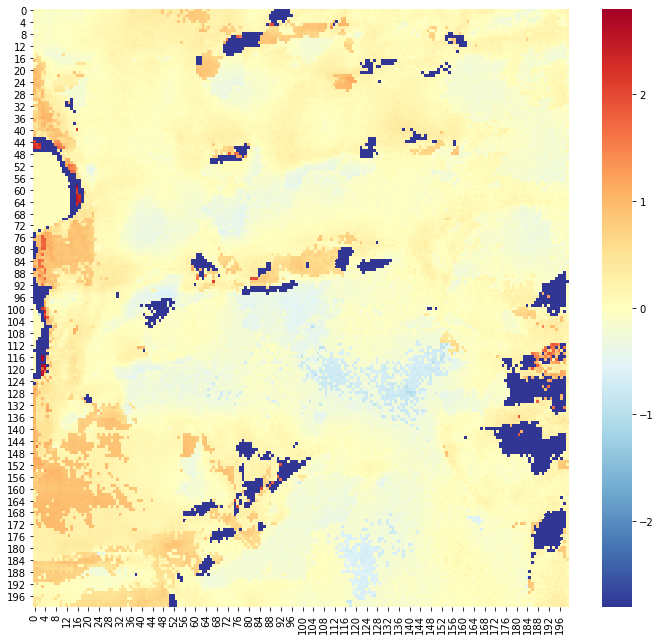

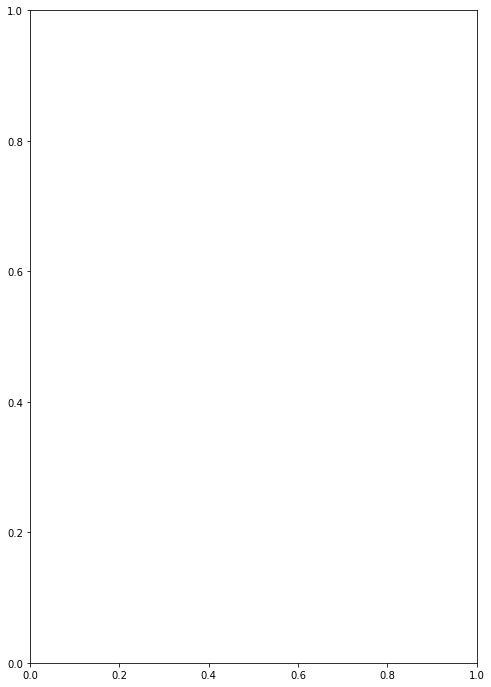

In [6]:
# Create data
df = pd.DataFrame(data, columns=np.arange(len(data[0])), index=np.arange(len(data)))

from matplotlib import cm as cm
fig, ax = plt.subplots(figsize=(12,11)) 
yeet = sns.heatmap(df, cmap=cm.get_cmap("RdYlBu_r"),ax=ax, vmin=-2.8, vmax=2.8)

fig, ax = plt.subplots(figsize=(8,12)) 
#yeet = sns.heatmap(df, cmap=cm.get_cmap("RdYlBu_r"),ax=ax, vmin=1.58, vmax=-1.58)
fig = yeet.get_figure()
fig.savefig("200x200heatMap.png")
#a = sns.heatmap(df, annot=True, fmt=".2f", annot_kws={"size": 5})
plt.show()

In [5]:
INTERVAL = 0.01 # this 0.01 is the distance between each x-axis label. So for example it goes 1.0, 1.01, 1.02 1.03...
data = data.flatten()
x_pos = np.arange(np.min(data), np.max(data), INTERVAL) 
x_pos = [round(num, 2) for num in x_pos]
y_pos = np.arange(len(x_pos))
################################################################################################################################
from collections import Counter
counter = Counter(data)
counts = []
for i in x_pos:
        counts.append(counter[i]) if i in counter.keys() else counts.append(0)
################################################################################################################################
plt.bar(y_pos, counts, align='center', alpha=0.95) # creates the bar plot
plt.xticks(y_pos, x_pos, fontsize = 4)
plt.xlabel('Distance from center peek', fontsize = 4)
plt.ylabel('Counts', fontsize = 4)
plt.title('Distance Counts', fontsize = 4)

ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=90)
ax.tick_params(axis='x', which='major', labelsize=4)
ax.tick_params(axis='y', which='major', labelsize=4)

[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % 5 != 0] 
# The '2' is the every nth number of labels its shows on the x-axis. So rn is shows every 2nd label. 

plt.gcf().subplots_adjust(bottom = 0.23)
plt.rcParams["figure.dpi"] = 500
plt.savefig("outputPictures/300x500BarChartAllOutliersRemoved.png")
plt.show()